# BM478 - Python İle Veri Bilimine Giriş Final Projesi

## Altay GÖKMEN 211001033 N.Ö.

### Eylul2022TopluUlasimVerisi:

Eylül 2022'ye ait İstanbul ilinin toplu ulaşım verilerini içerir. Her bir satır, bir toplu ulaşım geçişini temsil eder.

#### Sütunlar:

##### _id: Her geçişin benzersiz kimliğini temsil eden bir sayısal değer.
##### transition_date: Geçiş tarihini belirten bir tarih formatında değer.
##### transition_hour: Geçiş saati.
##### transport_type_id: Ulaşım türünü temsil eder önceden sayısal değere dönüştürülmüş.
##### road_type: Geçişin gerçekleştiği yol türünü belirten kategorik bir değer. Deniz ulaşımları: 0, Otoyol ulaşımları: 1, Raylı ulaşımlar 2 ile ifade edilmiştir.
##### line: Geçişin gerçekleştiği hat veya güzergahı temsil eden bir metin.
##### transfer_type: Transfer tipini belirten kategorik bir değer. Normal geçişler 1 ile Aktarmalı geçişler 0 ile ifade edildi.6
##### number_of_passage:Ggeçiş sayısını temsil eden bir sayısal değer.
##### number_of_passenger: Geçişteki toplam yolcu sayısını temsil eden bir sayısal değer*
##### day_of_week: Geçişin haftanın hangi günü gerçekleştiğini belirter sayısal değer. *
##### day_of_month: Geçişin ayın hangi gününde gerçekleştiğini belirter sayısal değer. *
      * ile belirtilen sütunlar verisetinin kendi sütunları olmayıp benim tarafımdan eklendi.

# -------------------------------------------------------------------------------------

## 1. Kütüphanelerin Eklenmesi ve Veri Setinin Anlamlandırılması

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("Eylül 2022 Toplu Ulasim Verisi.csv") #veri setini oku

In [46]:
df.info #veri seti hakk. bilgilendirme

<bound method DataFrame.info of            _id transition_date  transition_hour  transport_type_id road_type  \
0            1      2022-09-01                0                  1    OTOYOL   
1            2      2022-09-01                0                  1    OTOYOL   
2            3      2022-09-01                0                  2     RAYLI   
3            4      2022-09-01                0                  1    OTOYOL   
4            5      2022-09-01                0                  1    OTOYOL   
...        ...             ...              ...                ...       ...   
658019  658020      2022-09-30               23                  1    OTOYOL   
658020  658021      2022-09-30               23                  1    OTOYOL   
658021  658022      2022-09-30               23                  1    OTOYOL   
658022  658023      2022-09-30               23                  1    OTOYOL   
658023  658024      2022-09-30               23                  1    OTOYOL   

       

In [4]:
df.head() #ilk 5 veri

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
0,1,2022-09-01,0,1,OTOYOL,BASAKSEHIR 4.ETAP-KAYABASI KIPTAS KONUTLARI,Normal,48,45
1,2,2022-09-01,0,1,OTOYOL,YESILPINAR-4.LEVENT-ZINCIRLIKUYU METROBUS,Normal,6,5
2,3,2022-09-01,0,2,RAYLI,KADIKOY-KARTAL,Normal,98,95
3,4,2022-09-01,0,1,OTOYOL,ISTINYE DEREICI - FERAHEVLER - KABATAS,Normal,23,22
4,5,2022-09-01,0,1,OTOYOL,AYAZAGAKOYU-DAVUTPASA-YTU KAMPUSU,Aktarma,3,3


In [5]:
df.tail() #son 5 veri

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger
658019,658020,2022-09-30,23,1,OTOYOL,ZEYTINBURNU - MECIDIYEKOY,Normal,104,99
658020,658021,2022-09-30,23,1,OTOYOL,MESCIDI SELAM - BESIKTAS,Normal,413,407
658021,658022,2022-09-30,23,1,OTOYOL,TEPEUSTU-MECIDIYEKOY,Normal,63,63
658022,658023,2022-09-30,23,1,OTOYOL,AYAZMA SITESI - MAHMUTBEY METRO,Aktarma,14,14
658023,658024,2022-09-30,23,1,OTOYOL,YESILKENT - AVCILAR METROBUS,Aktarma,5,5


In [6]:
df.describe().T #transpoze şekilde verisetini açıkla -sayıları,ortalamları,standart sapmaları,min ve max değerler vb-

,count,mean,std,min,25%,50%,75%,max
_id,658024.0,329012.500000,189955.311104,1.0,164506.75,329012.5,493518.25,658024.0
transition_hour,658024.0,13.656663,5.337952,0.0,9.00,14.0,18.00,23.0
transport_type_id,658024.0,1.122514,0.447607,1.0,1.00,1.0,1.00,3.0
number_of_passage,658024.0,301.665888,1885.755016,1.0,13.00,49.0,168.00,75703.0
number_of_passenger,658024.0,288.550992,1795.031174,1.0,13.00,48.0,162.00,73803.0


In [11]:
df.transport_type_id.value_counts() #geçiş tipinin değer sayıları

1    607955
3     30548
2     19521
Name: transport_type_id, dtype: int64

In [12]:
df.	road_type.value_counts() #yol tipinin değer sayıları

OTOYOL    607955
DENZ       30548
RAYLI      19521
Name: road_type, dtype: int64

 #### *Veri Girişi Hatasının Düzeltilmesi

In [47]:
deniz = {
    'DENZ': 'DENİZ'
}
df['road_type'] = df['road_type'].replace(deniz)

In [14]:
df.	road_type.value_counts()

OTOYOL    607955
DENİZ      30548
RAYLI      19521
Name: road_type, dtype: int64

In [15]:
df.	transfer_type.value_counts()

Normal     371608
Aktarma    286416
Name: transfer_type, dtype: int64

In [49]:
df.	line.value_counts()

ALTUNIZADE-SULTANBEYLI        1353
KADIKOY-SARIGAZI-YENIDOGAN    1350
YENIKAPI - HACIOSMAN          1277
KADIKOY-BEYKOZ                1276
KADIKOY-YENIDOGAN             1273
                              ... 
TOPKAPI-KAZLICESME              13
YENIKAPI-ADALAR                  7
ALTUNIZADE-VEYSEL KARANI         6
YESILKENT-BEYKENT-TAKSIM         4
BOSTANCI-BAKIRKOY                1
Name: line, Length: 828, dtype: int64

In [17]:
df.	number_of_passage.value_counts()

1        25793
2        20471
3        17297
4        15125
5        13569
         ...  
6683         1
18039        1
7266         1
2694         1
3667         1
Name: number_of_passage, Length: 8711, dtype: int64

In [18]:
df.	number_of_passenger.value_counts()

1        26015
2        20534
3        17404
4        15221
5        13653
         ...  
16382        1
57457        1
18324        1
7487         1
10963        1
Name: number_of_passenger, Length: 8577, dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,658024.0,329012.500000,189955.311104,1.0,164506.75,329012.5,493518.25,658024.0
transition_hour,658024.0,13.656663,5.337952,0.0,9.00,14.0,18.00,23.0
transport_type_id,658024.0,1.122514,0.447607,1.0,1.00,1.0,1.00,3.0
number_of_passage,658024.0,301.665888,1885.755016,1.0,13.00,49.0,168.00,75703.0
number_of_passenger,658024.0,288.550992,1795.031174,1.0,13.00,48.0,162.00,73803.0


In [44]:
df.isnull().sum() #veri setindeki boş değerlerin sütun bazında sayıları

_id                    0
transition_date        0
transition_hour        0
transport_type_id      0
road_type              0
line                   0
transfer_type          0
number_of_passage      0
number_of_passenger    0
dtype: int64

In [21]:
print(str(df.ndim) + ' = boyut sayısı(boyut sayısını döndürür. Bir DataFrame her zaman 2 boyutludur, satır ve sütun.)')
print(str(df.shape) + '= boyut bilgisi(DataFrame\'in şeklini -satır ve sütun sayısını- bir tuple olarak döndürür.)')
print(str(df.size) + '= toplam eleman sayısı') #veri seti hakkında istenen bilgiler

2 = boyut sayısı(boyut sayısını döndürür. Bir DataFrame her zaman 2 boyutludur, satır ve sütun.)
(658024, 9)= boyut bilgisi(DataFrame'in şeklini -satır ve sütun sayısını- bir tuple olarak döndürür.)
5922216= toplam eleman sayısı


In [46]:
print(str(np.mean(df.number_of_passenger))+ '  =   Yolcu sayılarının Ortalaması')
print(str(df.number_of_passage.sum())+ '  =   Durak sayılarının toplamı')
print(str(df.number_of_passenger.min())+ '  =   Minimum yolcu sayısı')
print(str(df.number_of_passage.max())+ '  =   Maksimum Durak Sayısı')
print(str(df.number_of_passenger.var())+ '  =   Yolcu Sayılarının Varyasyonu')
print(str(df.number_of_passenger.std())+ '  =   Yolcu Sayılarının Standart Sapması') # veri setinin içeriği hakkında bilgi edinmek için 

288.55099206107985  =   Yolcu sayılarının Ortalaması
198503394  =   Durak sayılarının toplamı
1  =   Minimum yolcu sayısı
75703  =   Maksimum Durak Sayısı
3222136.9145221515  =   Yolcu Sayılarının Varyasyonu
1795.031173690906  =   Yolcu Sayılarının Standart Sapması


### 1.1. Geçişlerin Yol Türüne Göre Sınıflandırılıp Ayrı Ayrı Excel Dosyalarına Kaydedilmesi

In [59]:
print(str(df._id.axes) + " = _id")

[RangeIndex(start=0, stop=658024, step=1)] = _id


In [62]:
road_types = df['road_type'].unique()

#road_type'lar için ayrı dataframeler oluşturup excel dosyasına kaydetme
for road_type in road_types:
    #road_type'a göre filtreleme
    df_filtered = df[df['road_type'] == road_type]
    
    #Dosya adı road_type'a göre belirlenir
    file_name = f"road_type_{road_type}.xlsx"
    df_filtered.to_excel(file_name, index=False)
    print(f"{file_name} dosyası oluşturuldu.")

print("Dosyalar başarıyla oluşturuldu.") #yol tipi bazında sınıflandırarak bu tipleri içeren girdileri ayrı ayrı excel dosyası olarak kaydetme

road_type_OTOYOL.xlsx dosyası oluşturuldu.
road_type_RAYLI.xlsx dosyası oluşturuldu.
road_type_DENİZ.xlsx dosyası oluşturuldu.
Dosyalar başarıyla oluşturuldu.


# 2. Verinin Görselleştirilmesi

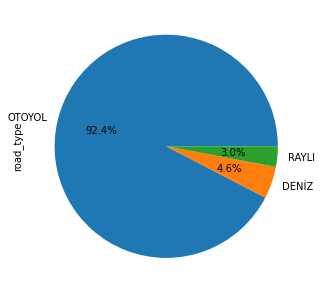

In [22]:
fig = plt.figure(figsize=(5, 15))
df.road_type.value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show() #yol tipinin pasta grafiği şeklinde görselleştirilmesi

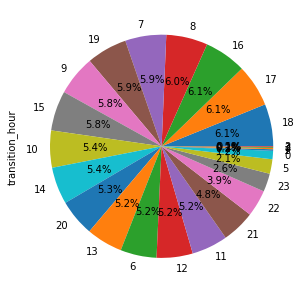

In [24]:
fig = plt.figure(figsize=(5, 15))
df.transition_hour.value_counts().plot(kind='pie', autopct='%.1f%%')
plt.show() #yolcuların saat kaçla ulaşım yaptıklarının incelenmesi için pasta dilimi grafiği

Text(0.5, 1.0, 'transition_hour Değişkeninin Sınıf Frekansları')

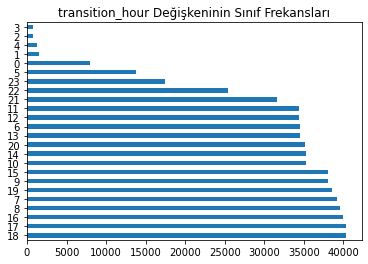

In [63]:
df["transition_hour"].value_counts().plot.barh().set_title("transition_hour Değişkeninin Sınıf Frekansları")

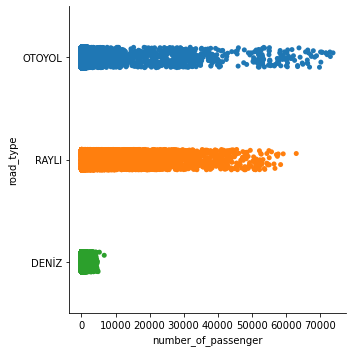

In [64]:
sns.catplot(x = "number_of_passenger", y = "road_type", data = df); #yol tipine bağlı olarak yolcu sayılarının catplot grafiği

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='number_of_passage', ylabel='Density'>

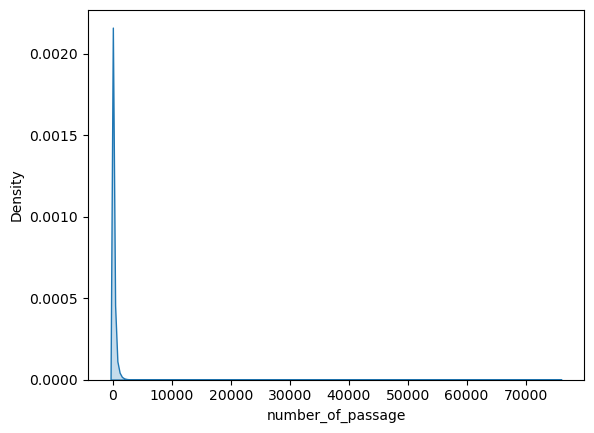

In [23]:
sns.kdeplot(df.number_of_passage, fill = True)
#olasılık yoğunluk fonksiyonu

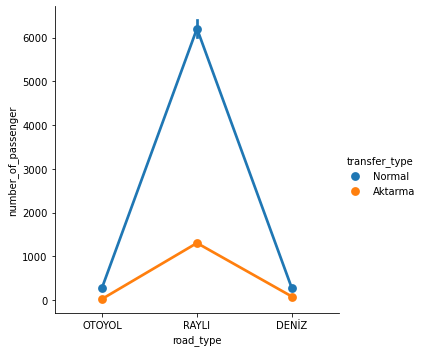

In [66]:
sns.catplot(x = "road_type", y = "number_of_passenger", hue = "transfer_type", kind = "point", data = df); #ulaşım ve yol tipine bağlı olarak yolcu sayısının incelenmesi

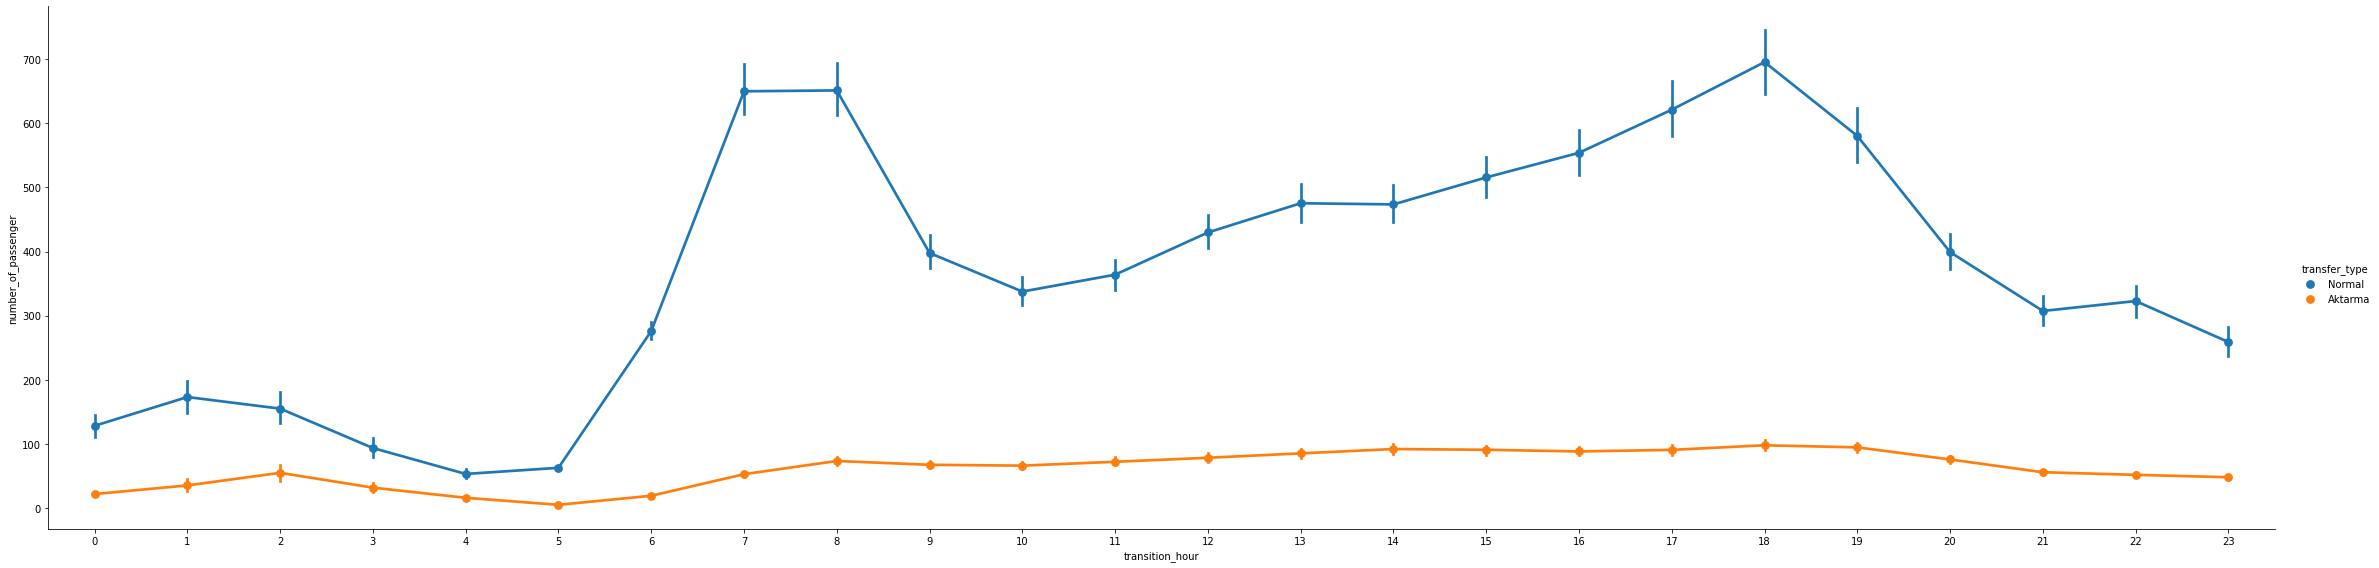

In [67]:
sns.catplot(x="transition_hour", y="number_of_passenger", hue="transfer_type", kind="point", data=df, height=8, aspect=4)
#saat bazında yolcu sayısını transfer tipi bakımından ayrı ayrı inceleyebildiğimiz grafik, yolcu sayısının iş saatlerinde arttığını anlamak açısından önemli

<AxesSubplot:xlabel='number_of_passage'>

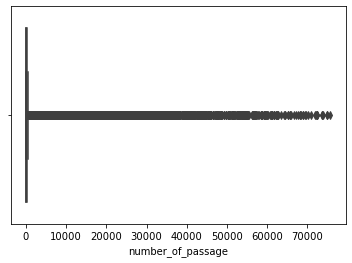

In [68]:
sns.boxplot(x = df["number_of_passage"])

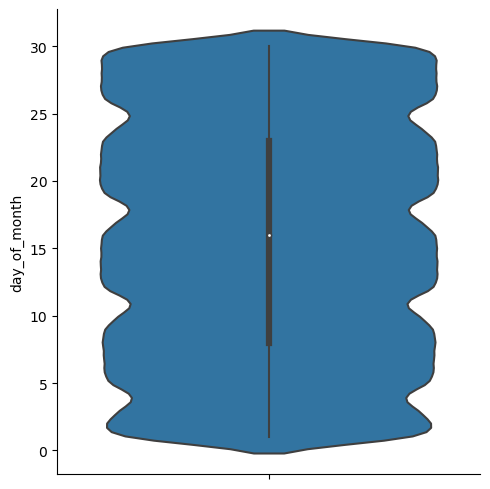

In [33]:
sns.catplot(y = "day_of_month", kind = "violin", data = df)
#verinin dağılımını ve yoğunluğunu gösterir ve veri setinin farklı bölgelerindeki yoğunlukları karşılaştırmayı kolaylaştırır.

<AxesSubplot:xlabel='number_of_passage', ylabel='transition_date'>

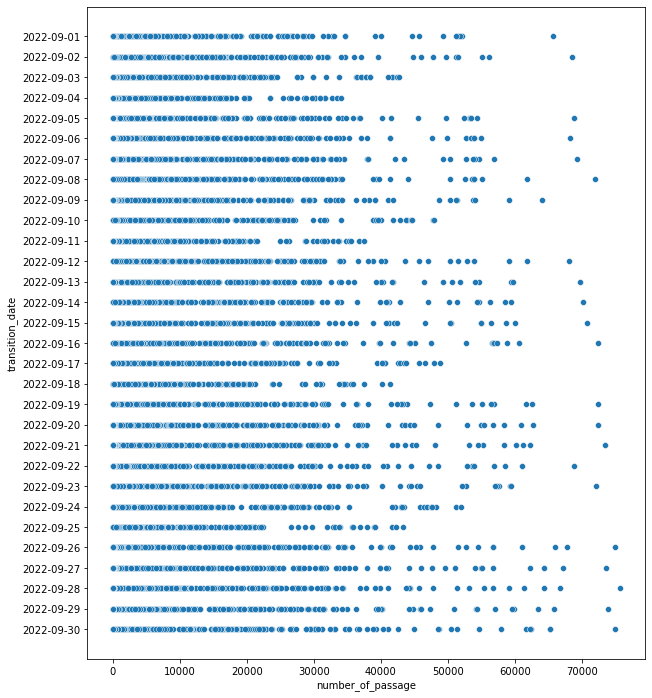

In [70]:
plt.figure(figsize=(10, 12))
sns.scatterplot(x = "number_of_passage", y = "transition_date", data = df)

In [35]:
aykırı_degerlerin_cikarilacagi_sutun = 'number_of_passenger'

# Z-skorunu hesapla
df['z_score'] = (df[aykırı_degerlerin_cikarilacagi_sutun] - df[aykırı_degerlerin_cikarilacagi_sutun].mean()) / df[aykırı_degerlerin_cikarilacagi_sutun].std()

# Aykırı değerleri filtrele
temizlenmis_df = df[(df['z_score'] > -3) & (df['z_score'] < 2)]

# Z-skoru sütununu kaldır
temizlenmis_df = temizlenmis_df.drop(columns=['z_score'])

print(f"Orijinal veri seti boyutu: {df.shape}")
print(f"Temizlenmiş veri seti boyutu: {temizlenmis_df.shape}")
df = temizlenmis_df 
"""
yolcu sayısı alanı toplu ulaşımın tren vapur gibi daha çok yolcu alan araçlar 
yüzünden bu değerler için anormal artıyor, bunun azaltılması için yolcu sayısının ortalamasıyla farkının standart sapmasını 
hesaplayıp çıkan sonuç -3 ve 2 aralığında değilse bunu verisetimden temizledim
"""

Orijinal veri seti boyutu: (658024, 12)
Temizlenmiş veri seti boyutu: (651759, 11)


'\nyolcu sayısı alanı toplu ulaşımın tren vapur gibi daha çok yolcu alan araçlar \nyüzünden bu değerler için anormal artıyor, bunun azaltılması için yolcu sayısının ortalamasıyla farkının standart sapmasını \nhesaplayıp çıkan sonuç -3 ve 2 aralığında değilse bunu verisetimden temizledim\n'

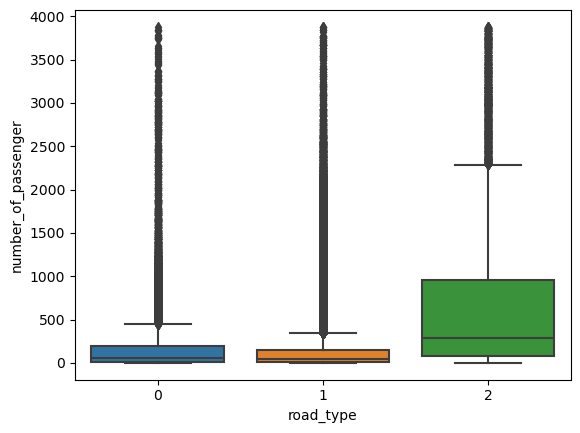

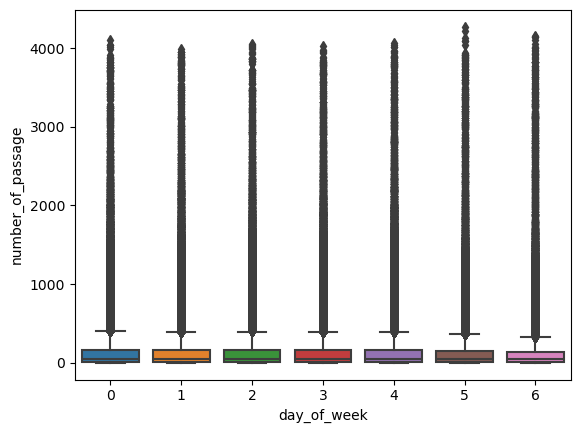

'Medyan (Orta Çizgi): Verinin ortanca değerini gösterir.\nQ1 (Alt Çeyrek) ve Q3 (Üst Çeyrek): Verinin alt ve üst çeyreklik dilimlerini gösterir. Kutu, Q1 ile Q3 arasındaki verileri kapsar.\nMinimum ve Maksimum Değerler (Kuyruklar): Verinin minimum ve maksimum değerlerini gösterir, ancak aykırı değerler bu kuyrukların dışında olabilir.\nAykırı Değerler (Outliers): Verinin geri kalanından önemli ölçüde farklı olan değerlerdir ve genellikle kutunun dışındaki noktalar olarak gösterilir.'

In [36]:
sns.boxplot(x='road_type', y='number_of_passenger', data=df)
plt.show()

# verinin merkezi eğilimleri, dağılımı ve olası aykırı değerleri hakkında bilgi verir.

sns.boxplot(x='day_of_week', y='number_of_passage', data=df)
plt.show()

"""Medyan (Orta Çizgi): Verinin ortanca değerini gösterir.
Q1 (Alt Çeyrek) ve Q3 (Üst Çeyrek): Verinin alt ve üst çeyreklik dilimlerini gösterir. Kutu, Q1 ile Q3 arasındaki verileri kapsar.
Minimum ve Maksimum Değerler (Kuyruklar): Verinin minimum ve maksimum değerlerini gösterir, ancak aykırı değerler bu kuyrukların dışında olabilir.
Aykırı Değerler (Outliers): Verinin geri kalanından önemli ölçüde farklı olan değerlerdir ve genellikle kutunun dışındaki noktalar olarak gösterilir."""

C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transfer_type', ylabel='Density'>

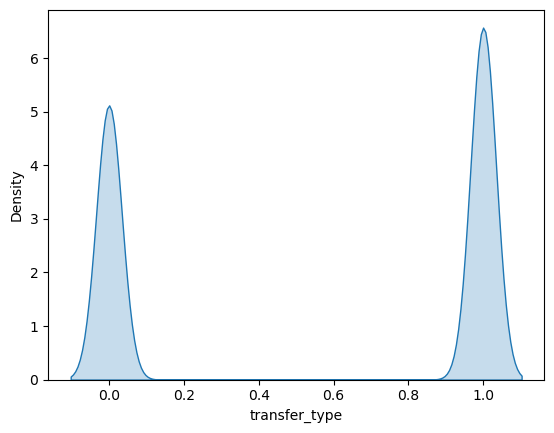

In [38]:
sns.kdeplot(df.transfer_type, fill = True)

<AxesSubplot:xlabel='number_of_passenger', ylabel='Density'>

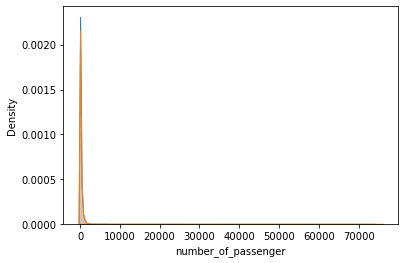

In [89]:
sns.kdeplot(df.number_of_passenger, shade = True)

# 3. Verinin Aykırı Değerlerden Arındırılması

#### 3.1. Çeyrekleri Kullanarak BoxPlot Yöntemi ile Aykırı Değerleri Temizleme Örneği 
Bu yöntemi kullanmadım çünkü aşağıda z-score yöntemini kullanacağım. 

In [48]:
from scipy.stats import shapiro
test_istatistigi, pvalue = shapiro(df["transition_hour"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["number_of_passenger"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
###Korelasyon var mı ona baktık,

Test İstatistiği = 0.9693, p-değeri = 0.0000
Test İstatistiği = 0.1078, p-değeri = 0.0000


C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:
df_table = df["number_of_passenger"]
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [50]:
print(Q1)
print(Q3)
print(IQR)

13.0
162.0
149.0


In [51]:
alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print(alt_sinir)
print(ust_sinir)

-210.5
385.5


In [52]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0         False
1         False
2         False
3         False
4         False
          ...  
658019    False
658020     True
658021    False
658022    False
658023    False
Name: number_of_passenger, Length: 658024, dtype: bool

In [53]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
df_table[aykiri_tf]

36          442
45         1193
131        5953
138         680
237         426
          ...  
657984      664
657993     3540
658001    10963
658003      403
658020      407
Name: number_of_passenger, Length: 79851, dtype: int64

In [54]:
rayli_veriler = df[df['road_type'] == 'RAYLI']
print(rayli_veriler[['number_of_passenger', 'number_of_passage']].describe())
#ulaşım türü raylı olan verilerin modele olumsuz anlamda etki edebileceğini düşündüğüm için onları incelemek istedim

       number_of_passenger  number_of_passage
count         19521.000000       19521.000000
mean           3932.101327        4157.556887
std            7406.435884        7839.588918
min               1.000000           1.000000
25%             156.000000         168.000000
50%             629.000000         719.000000
75%            4276.000000        4370.000000
max           63018.000000       65230.000000


#### 3.2. Z-score Yöntemi ile Aykırı Değerlerin Temizlenmesi

In [55]:


# Z-skorunu hesapla
df['z_score_passenger'] = (df['number_of_passenger'] - df['number_of_passenger'].mean()) / df['number_of_passenger'].std()
df['z_score_passage'] = (df['number_of_passage'] - df['number_of_passage'].mean()) / df['number_of_passage'].std()

# Z-skoru -3 ile 3 arasında olan verileri filtrele
temizlenmis_df = df[(df['z_score_passenger'].abs() <= 3) & (df['z_score_passage'].abs() <= 3)]

# Z-skoru sütunlarını kaldır
temizlenmis_df = temizlenmis_df.drop(columns=['z_score_passenger', 'z_score_passage'])

print(f"Orijinal rayli veri seti boyutu: {df.shape}")
print(f"Temizlenmiş rayli veri seti boyutu: {temizlenmis_df.shape}")
df = temizlenmis_df #üstte grafikteki aşırılığı önlemek için yaptığımız temizleme işleminin benzerini yaptık

Orijinal rayli veri seti boyutu: (658024, 11)
Temizlenmiş rayli veri seti boyutu: (653115, 9)


In [56]:
df[['number_of_passenger', 'number_of_passage']].describe()
#Geçiş sayısı ile yolcu sayısının ilişkisinin incelenmesi

,number_of_passenger,number_of_passage
count,653115.000000,653115.000000
mean,164.907627,171.030025
std,366.555408,378.877272
min,1.000000,1.000000
25%,13.000000,13.000000
50%,47.000000,48.000000
75%,157.000000,162.000000
max,5673.000000,5957.000000


#### 3.3. İşlevsiz sütundan işlevli sütunlar elde edilmesi

In [57]:
df['transition_date'] = pd.to_datetime(df['transition_date'])
df['day_of_week'] = df['transition_date'].dt.dayofweek
df['day_of_month'] = df['transition_date'].dt.day #modellemeler tarih tipinden veri kabul etmediği için tarih verisini bu şekilde 
#parçalayıp sayısal hale getirdim çünkü tarih verisi yani haftanın ve ayın hangi günü olduğu bizim yolcu sayısı verilerimizi etkileyecektir"""

#### 3.4. Kategorik verilerin Label Encoding ile sayısal verilere dönüştürülmesi

In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['line'] = label_encoder.fit_transform(df['line'])
df['transfer_type'] = label_encoder.fit_transform(df['transfer_type'])
df["road_type"] = label_encoder.fit_transform(df['road_type'])


# 4. Makine Öğrenmesi Modelinin Oluşturulması

## 4.1. Doğrusal Regresyon

### 4.1.1. Çoklu Doğrusal Regresyon

Basit doğrusal regresyonla benzer bir işleyişi vardır ancak burada birden fazla değişken işin içine girdiği için çoklu doğrusal regresyondur

#### 4.1.1.1. Eğitim ve Test Setlerini Hazırlama

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(columns=["number_of_passenger","transition_date","road_type","_id","transition_date","road_type",'day_of_week','day_of_month'], axis = 1)
y = df["number_of_passenger"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

#X_train: Eğitim seti için özellikler.
#X_test: Test seti için özellikler.
#y_train: Eğitim seti için hedef değişken.
#y_test: Test seti için hedef değişken.
#test_size=0.20: Verinin %20'si test seti olarak ayrılır, kalan %80'i eğitim seti olarak kullanılır.
#random_state=42: Rastgelelik kontrolü için bir sabit.


In [142]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(522492, 5)
(522492,)
(130623, 5)
(130623,)


In [143]:
training = df.copy()
training.shape

(653115, 12)

### 4.1.1.2. Çoklu Doğrusal Regresyon Modeli Oluşturmak

In [144]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)
#sabit katsayı
print(model.intercept_)
#bağımsız deşişken katsayıları 
print(model.coef_)

11.025556066491589
[-2.34995334e-01 -6.17862019e+00  1.93184423e-03 -4.52251208e+00
  9.69047679e-01]


#### 4.1.1.3. Yeni veri seti üzerindeki tahminleri hesaplar ve bu tahminleri yazdırır.

In [145]:
data = data[['transition_hour', 'transport_type_id', 'transfer_type', 'number_of_passage', 'line']]

In [146]:
tahminler = model.predict(data) #dataya göre hedef değişkenlerin değerlerini tahmin eder.
print("Tahminler:", tahminler)

Tahminler: [-212.23364391]


In [147]:
yeni_veri = [[0], [1],[1],[48],[78]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2,3,4
0,0,1,1,48,78


In [148]:
model.predict(yeni_veri)

array([-136.6459931])

In [43]:
df.head(1)

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,day_of_week,day_of_month
0,1,2022-09-01,0,1,1,78,1,48,45,3,1


Kötü bir tahmin yaptığını söyleyebiliriz.

### 4.1.2. PCR (Temel Bileşen Regresyonu - Principal Component Regression)

İstatistikte temel bileşen regresyonu (PCR), temel bileşen analizine (PCA) dayalı bir regresyon analizi tekniğidir. Daha spesifik olarak, standart bir doğrusal regresyon modelinde bilinmeyen regresyon katsayılarını tahmin etmek için PCR kullanılır.

#### 4.1.2.1. Model

In [124]:
y = df["number_of_passenger"]
X_ = df.drop(["transition_date","number_of_passenger","_id"], axis = 1).astype("float64")

In [126]:
from sklearn.model_selection import train_test_split


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (477924, 10)
y_train (477924,)
X_test (159309, 10)
y_test (159309,)
training (637233, 11)


In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA() #modeli olustur
#indirgenmiş veriseti (transform indirgeme islemi)(scale islemi veri standardizasyonu yapmayi saglar)

X_reduced_train = pca.fit_transform(scale(X_train)) #veriyi standartize et ve x-train'e uygula 
#ilk gözlemin tüm bileşenlerde incelenmesi
X_reduced_train[0:1,:]

array([[ 6.09358686e-01, -4.52652846e-01, -1.75490347e+00,
        -7.60505245e-01,  7.84214220e-01,  1.61236685e+00,
         9.89512814e-02, -9.95072917e-02,  6.44901425e-02,
        -4.05866922e-17]])

In [129]:
#PCA uygulandıktan sonra kümülatif varyans yüzdelerini hesaplar
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 28.76,  45.43,  57.93,  68.71,  78.73,  87.95,  94.67,  97.96,
       100.  , 100.  ])

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print(pcr_model.intercept_)
print(pcr_model.coef_)
#Modelin sabit terimi ve katsayıları

122.41369339058093
[ 7.51930662e+01  1.90531842e+01  8.92475272e+01 -3.73938034e+00
 -1.80298994e+01 -9.62778085e-01  7.99165938e+01 -5.26853240e+00
  1.18842627e+02 -2.57192593e-28]


#### 4.1.2.2. Tahmin

In [133]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([6.23641600e+00, 8.51728388e+00, 3.03571855e+02, 3.15273165e+00,
       1.48894957e-01])

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

10.304913798286908

In [135]:
df["number_of_passenger"].mean()

122.40990187262744

In [136]:
r2_score(y_train, y_pred)
#model iyi bir performasn gösteriyor

0.9969181790395208

In [137]:
pca2 = PCA()
X_reduced_test = pca2.fit_transform(scale(X_test))
y_pred = pcr_model.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, y_pred))

10.99848184853965

In [143]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,     #Veriyi 10 parçaya böler.
                             shuffle = True,       #Veriyi karıştırır, böylece her parçada farklı veriler olur.
                             random_state = 1)     #Karıştırma işleminin tekrarlanabilir olması için rastgelelik durumunu ayarlar.
lm = LinearRegression()
RMSE = [] #RMSE değerlerini depolamak için


for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm,                                     #modeli değerlendirir ve RMSE hesaplar
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

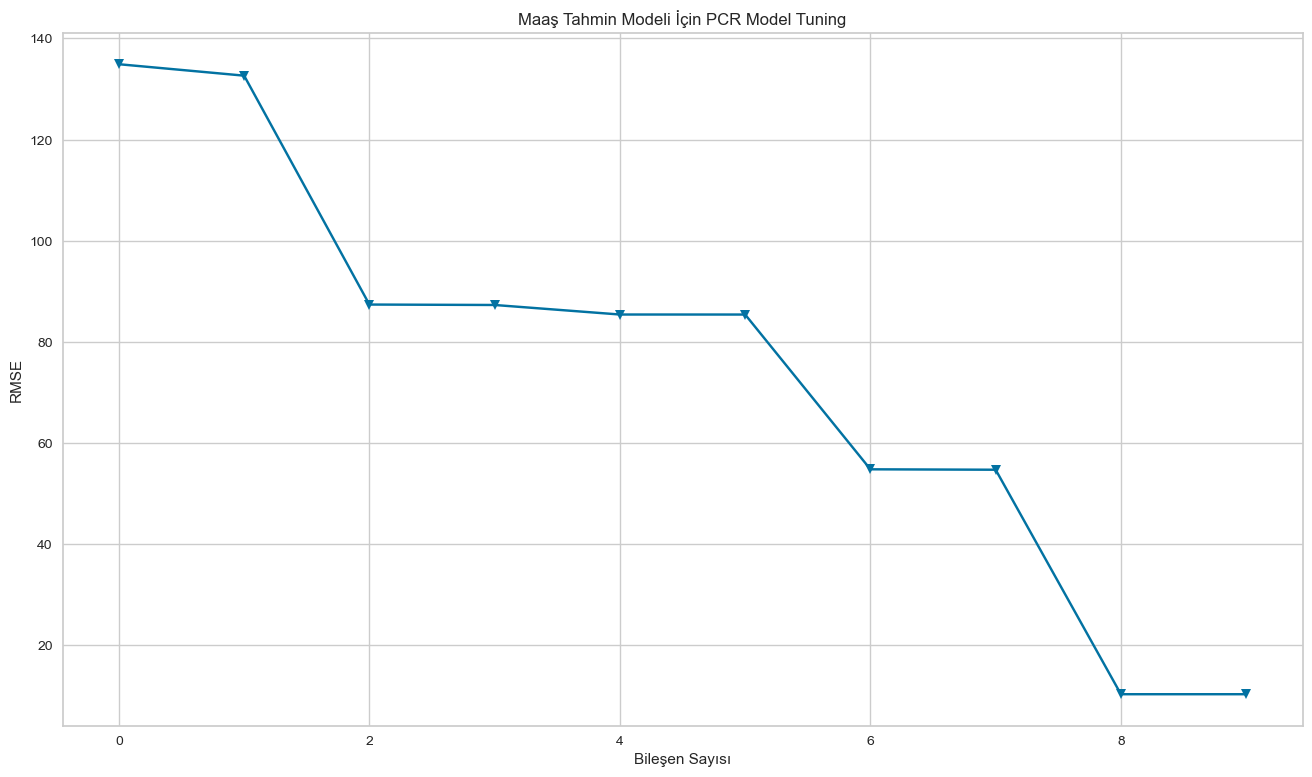

In [144]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [145]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:8], y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:8])
print(np.sqrt(mean_squared_error(y_train, y_pred)))
y_pred = pcr_model.predict(X_reduced_test[:,0:8])
print(np.sqrt(mean_squared_error(y_test, y_pred))) #modelin tahminleri ile gerçek değerler arasındaki farkın (hata) karesinin ortalamasıdır.

54.69906234644886
54.92427899435124


### 4.1.3. PLS (Kısmi En Küçük Kareler Regresyonu)¶

Değişkenlerin az sayıda ve aralarında çoklu doğrusal bağlantı problemi bulunmayan bileşenlere indirgeyip regresyon modeli kurulması

#### 4.1.3.1. Model

In [11]:


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop(columns=["number_of_passenger","transition_date","road_type","_id","transition_date","road_type",'day_of_week','day_of_month'], axis = 1)
y = df["number_of_passenger"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD
#tum bilesenler alindi
pls_model = PLSRegression().fit(X_train, y_train)
#3 bilesene indirgeyebiliriz ancak bu ara katmandaki PLS factor sayisini belirler, degisken sayisi aynidir.

In [ ]:
mponents=3).fit(X_train, y_train)
pls_model.coef_

#### 4.1.3.2. Tahmin

In [13]:
X_train.head()

,transition_hour,transport_type_id,line,transfer_type,number_of_passage
35718,15,1,88,1,236
322478,19,1,320,1,43
361648,15,1,133,0,26
229501,17,1,94,0,13
266374,11,1,186,1,72


In [14]:
pls_model.predict(X_train)

array([[220.76652741],
       [ 41.09099825],
       [ 23.30176833],
       ...,
       [560.9091191 ],
       [444.74324917],
       [ 51.7261885 ]])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = pls_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

15.57853176070234

In [16]:
r2_score(y_train, y_pred)
#Bu model de başarılı

0.9981567113846097

In [17]:
y_pred = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

15.897081274226329

#### 4.1.3.3. Model Tuning

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

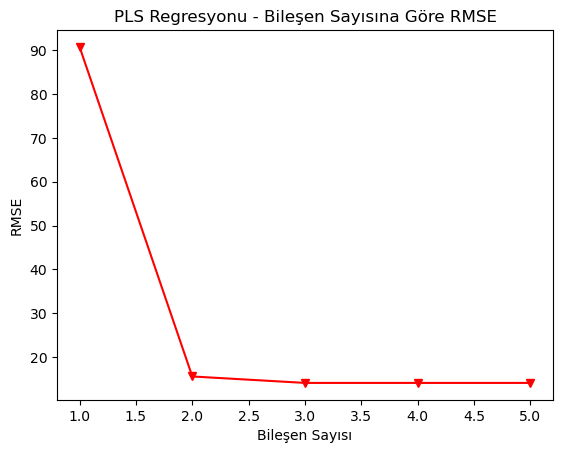

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
cv_10 = KFold(n_splits=10, shuffle=True, random_state=1)

# Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train_scaled.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1 * cross_val_score(pls, X_train_scaled, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
import matplotlib.pyplot as plt
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('PLS Regresyonu - Bileşen Sayısına Göre RMSE');

In [31]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [32]:
y_pred = pls_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))


15.897081274226329

In [35]:
optimal_components = np.argmin(RMSE) + 1
print(f"En iyi bileşen sayısı: {optimal_components}")

# Modeli eğitme
pls_model = PLSRegression(n_components=optimal_components)
pls_model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_train_pred = pls_model.predict(X_train_scaled)
y_test_pred = pls_model.predict(X_test_scaled)

# eğitim verisi
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Eğitim Verisi - RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R^2: {r2_train:.2f}")

# Test verisi
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

En iyi bileşen sayısı: 5
Eğitim Verisi - RMSE: 14.11, MAE: 5.21, R^2: 1.00


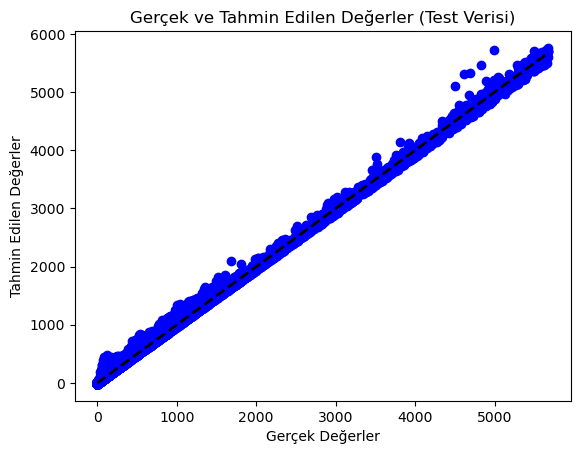

In [36]:

# Tahmin sonuçlarını görselleştirme 
plt.scatter(y_test, y_test_pred, c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler (Test Verisi)')
plt.show()

## 4.2.  Doğrusal Olmayan Regresyon

### 4.2.1. K En Yakın Komşu (KNN)

K-en yakın komşu (k-nearest neighbors, KNN) algoritması, gözlemlerin birbirlerine olan benzerlikleri üzerinden tahminlerin yapıldığı gözetimli makine öğrenmesi modellerinde kullanılan algoritma.

#### 4.2.1.1. Model

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [16]:
from sklearn.metrics import mean_squared_error


#### 4.2.1.2. Tahmin

In [17]:
y_pred = knn_model.predict(X_test)

print("test hatası:" , np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE = [] 
#cross validation yapmadan hatalara bir bakalim
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)
    #k kaç komşuya baktığını ifade ederken rmse ise tahmin hatasının büyüklüğüdür

test hatası: 11.521658644960464
k = 1 için RMSE değeri:  0.9402616684925765
k = 2 için RMSE değeri:  6.175548845179103
k = 3 için RMSE değeri:  7.674131283811871
k = 4 için RMSE değeri:  8.47845911246972
k = 5 için RMSE değeri:  9.026424931530096
k = 6 için RMSE değeri:  9.449174591394563
k = 7 için RMSE değeri:  9.791931136787692
k = 8 için RMSE değeri:  10.08010855471307
k = 9 için RMSE değeri:  10.313123023904529
k = 10 için RMSE değeri:  10.504862520214065


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

#### 4.2.1.3 Model Tuning

In [25]:
#GridSearchCV ile optimum k sayisinin belirlenmesi
knn_params = {'n_neighbors': np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [26]:
knn_cv_model.best_params_["n_neighbors"]

4

In [27]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    #cross validation olmadan hatalar
    RMSE.append(rmse) 
    #cross validation kullanilarak alindan hatalar
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv ) #cv_rmse, çapraz doğrulama ile değerlendirmektedir
    #farklı k (komşu sayısı) değerleri için K-Nearest Neighbors (KNN) regresyon modelinin performansını değerlendirmek 

k = 1 için RMSE değeri:  0.9402616684925765 RMSE_CV değeri:  12.468128577692331
k = 2 için RMSE değeri:  6.175548845179103 RMSE_CV değeri:  11.650947125782192
k = 3 için RMSE değeri:  7.674131283811871 RMSE_CV değeri:  11.482934481621248
k = 4 için RMSE değeri:  8.47845911246972 RMSE_CV değeri:  11.450000388225638
k = 5 için RMSE değeri:  9.026424931530096 RMSE_CV değeri:  11.493712686709268
k = 6 için RMSE değeri:  9.449174591394563 RMSE_CV değeri:  11.570759455915724
k = 7 için RMSE değeri:  9.791931136787692 RMSE_CV değeri:  11.675923736193417
k = 8 için RMSE değeri:  10.08010855471307 RMSE_CV değeri:  11.735999183041047
k = 9 için RMSE değeri:  10.313123023904529 RMSE_CV değeri:  11.79586887497649
k = 10 için RMSE değeri:  10.504862520214065 RMSE_CV değeri:  11.85988112716833


In [28]:
#k=4 için train degil test setini denediğimizde
knn_tuned = KNeighborsRegressor(n_neighbors =4)
knn_tuned.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

11.468546749125334

In [29]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train) #en iyi k sabiti ile modeli oluştur ve eğit

KNeighborsRegressor(n_neighbors=4)

In [30]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

11.468546749125334

## 4.3. Sınıflandırma Problemleri

### 4.3.1. Extreme Gradient Boosting (XGBoost)

verideki her değeri incelemek yerine veriyi parçalara(quantile) böler ve bu parçalara göre çalışır

#### 4.3.1.2. Model

In [66]:
X = df.drop(columns=["number_of_passenger","transition_date","road_type","_id","transition_date","road_type",'day_of_week','day_of_month'], axis = 1)
y = df["road_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

##### veri çerçevesinden bağımsız (özellik) ve bağımlı (hedef) değişkenleri ayırır ve ardından bu veri setini eğitim ve test setlerine böler.

In [67]:
params = {
    "colsample_bytree": [0.3, 0.4, 0.5], #kullanılacak özelliklerin (değişkenlerin) oranı
    "learning_rate": [0.005, 0.01, 0.015], #öğrenme oranı
    "max_depth": [1, 2, 3], #ağaçların derinliği, karmaşıklık
    "n_estimators": [50, 100, 150] #modelde kaç ağaç kullanılacak
}

In [68]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
import numpy as np
from sklearn import model_selection

In [69]:
xgb_model = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')
grid = GridSearchCV(xgb_model, params, cv=10, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train) #XGBoost modeli için hiperparametre optimizasyonu yapmak amacıyla GridSearchCV kullanır. 

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5],
                         'learning_rate': [0.005, 0.01, 0.015],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

#### 4.3.1.3. En iyi hiperparametreleri belirlemek ve modeli eğitmek için çeşitli kombinasyonları değerlendirmek

In [70]:
print(grid.best_params_)

{'colsample_bytree': 0.4, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 150}


In [71]:
xgb1 = XGBRegressor(colsample_bytree = 0.4, learning_rate = 0.015, max_depth = 3, n_estimators = 150, enable_categorical=True)

In [72]:
model_xgb = xgb1.fit(X_train, y_train)

In [81]:
model_xgb.predict(X_test)[0:10]

array([0.9962187 , 0.99581456, 0.9843888 , 0.9957786 , 0.99682194,
       0.9962187 , 0.9880391 , 0.9884387 , 1.0008718 , 0.98658395],
      dtype=float32)

In [82]:
y_test[0:10]

500016    1
87995     1
496040    1
474764    1
607134    1
109509    1
325777    1
287025    1
180642    1
215527    1
Name: road_type, dtype: int32

#### 4.3.1.4. X_test veri setindeki tahminlerinin doğruluğunu y_test gerçek değerleri ile karşılaştırarak ölçer.

In [75]:
model_xgb.score(X_test, y_test)

0.8326984572901407

özellik önemleri

In [76]:
importance = pd.DataFrame ({"Importance": model_xgb.feature_importances_},
index=X_train.columns)
importance

,Importance
transition_hour,0.001011
transport_type_id,0.952129
line,0.026259
transfer_type,0.008391
number_of_passage,0.012211


In [77]:
from sklearn.metrics import mean_squared_error

y_pred = model_xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}') #148 iyi onbinler seviyesinde değerlere sahip bir veriseti için idare eder bir rmse.

RMSE: 0.10806630389195114


#### 4.3.1.5. XGBoost modelinin test veri seti üzerindeki tahmin performansını değerlendirmek için farklı metrikler

In [78]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)


# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, xgb_model.predict(X_test))
print(f'MSE: {mse}')

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y_test, xgb_model.predict(X_test))
print(f'MAE: {mae}')

# Kök Ortalama Kare Hata (RMSE)
rmse = mean_squared_error(y_test, xgb_model.predict(X_test), squared=False)
print(f'RMSE: {rmse}')

# R-kare (R^2)
r2 = r2_score(y_test, xgb_model.predict(X_test))
print(f'R^2: {r2}')

MSE: 2.7373721984391253e-12
MAE: 4.848906891839768e-07
RMSE: 1.6545005888300931e-06
R^2: 0.9999999999607849


## 4.4. Gözetimsiz Öğrenme

### 4.4.1. K-Mean

K-means algoritmasının çalışma mekanizmasına göre öncelikle her kümenin merkez noktasını veya ortalamasını temsil etmek üzere K adet nesne rastgele seçilir. Kalan diğer nesneler, kümelerin ortalama değerlerine olan uzaklıkları dikkate alınarak en benzer oldukları kümelere dahil edilir.

Gözetimsiz bir öğrenme olduğu için denetlenmesi gerekmez kendi çalışır

#### 4.4.2. Model

In [116]:
from warnings import filterwarnings
filterwarnings('ignore') #uyarıları görmezden gel

In [25]:
import scipy as sp
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import KElbowVisualizer

In [99]:
tarihsutunsuzdf = df.drop(columns=['transition_date', '_id'])

#### 4.4.3. Görselleştirme

In [41]:
kmeans = KMeans(n_clusters = 4) # küme sayısı 4
kmeans

KMeans(n_clusters=4)

In [42]:
k_fit = kmeans.fit(tarihsutunsuzdf)

In [43]:
k_fit.n_clusters

4

In [44]:
k_fit.cluster_centers_ #küme merkezleri

array([[1.36673701e+01, 1.12898545e+00, 9.58101821e-01, 2.05047019e+02,
        5.22124653e-01, 8.60233464e+01, 8.27861234e+01, 2.93941812e+00,
        1.55071803e+01],
       [1.45749362e+01, 1.84885204e+00, 1.65943878e+00, 4.94015306e+02,
        5.61862245e-01, 3.85745121e+03, 3.75459152e+03, 3.01881378e+00,
        1.55188138e+01],
       [1.36598736e+01, 1.08174140e+00, 9.81531261e-01, 6.25496459e+02,
        5.32195781e-01, 8.65279658e+01, 8.37982903e+01, 2.90450768e+00,
        1.55850845e+01],
       [1.34750821e+01, 1.20180678e+00, 1.01797447e+00, 3.96724392e+02,
        9.53505301e-01, 8.98775571e+02, 8.63420991e+02, 2.79281768e+00,
        1.63664327e+01]])

In [46]:
kumeler = k_fit.labels_

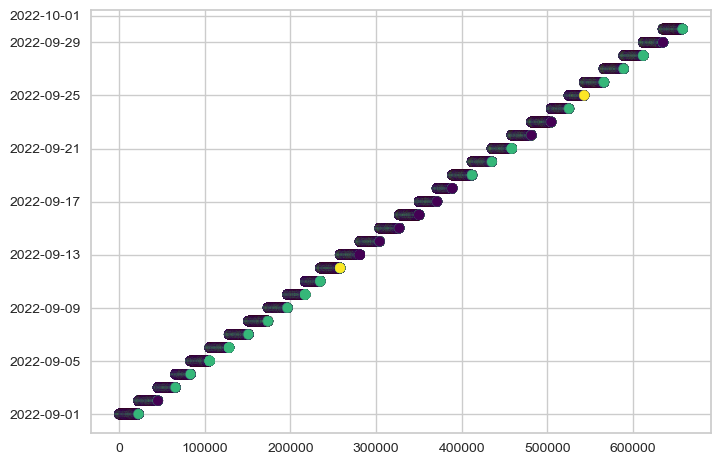

In [47]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")  #veri grupları veya yoğunlukları görsel olarak belirlenir.

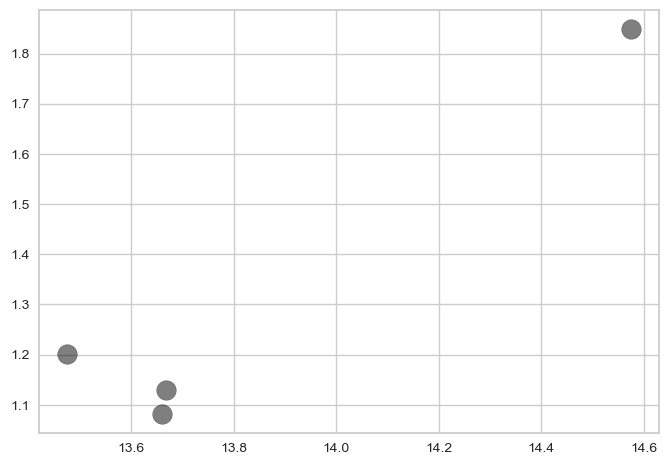

In [48]:
merkezler = k_fit.cluster_centers_
#küme merkezleri
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

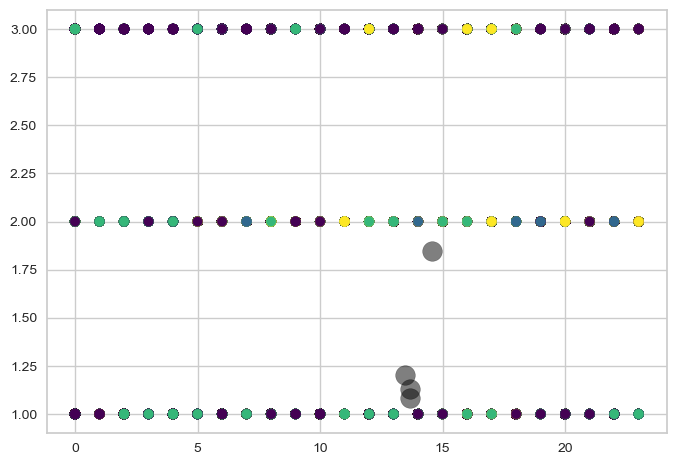

In [51]:
plt.scatter(tarihsutunsuzdf.iloc[:,0], tarihsutunsuzdf.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [100]:
tarihsutunsuzdf

,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,day_of_week,day_of_month
0,0,1,1,78,1,48,45,3,1
1,0,1,1,801,1,6,5,3,1
2,0,2,2,387,1,98,95,3,1
3,0,1,1,344,1,23,22,3,1
4,0,1,1,57,0,3,3,3,1
...,...,...,...,...,...,...,...,...,...
658019,23,1,1,819,1,104,99,4,30
658020,23,1,1,517,1,413,407,4,30
658021,23,1,1,656,1,63,63,4,30
658022,23,1,1,58,0,14,14,4,30


In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [102]:
features = df[['transition_hour', 'transport_type_id', 'road_type', 'line', 'transfer_type', 'number_of_passage', 'number_of_passenger', 'day_of_week', 'day_of_month']]

In [103]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) #sütunları üstte seçerek verileri standartlaştırdık

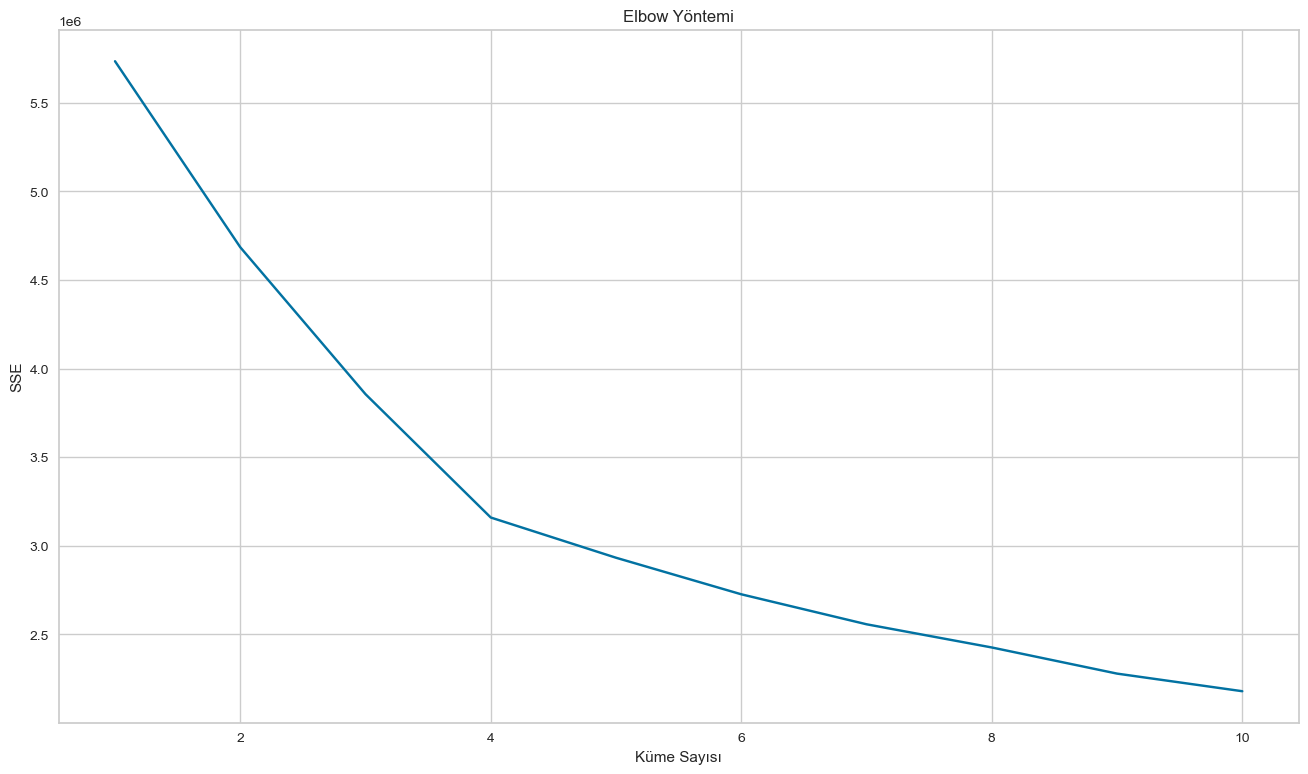

In [104]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Küme Sayısı')
plt.ylabel('SSE')
plt.title('Elbow Yöntemi')
plt.show() #Elbow Yöntemi, K-Means kümeleme algoritmasının en uygun küme sayısını belirlemek için kullanılır
#SSE, her bir veri noktasının, kendi küme merkezine olan uzaklığının karesinin toplamıdır.


#### 4.4.4. Tahmin

In [105]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [106]:
df['cluster'] = kmeans.labels_

In [114]:
new_data = np.array([[0, 1, 1, 78, 1, 48, 3, 1, 1]])

# Yeni veriyi normalleştirelim
scaled_new_data = scaler.transform(new_data)

# Tahmin yapalım
cluster_prediction = kmeans.predict(scaled_new_data)

print(f"Yeni veri için tahmin edilen küme: {cluster_prediction[0]}") #0,1,2 kümeleri var en yakın 1. küme merkezine

Yeni veri için tahmin edilen küme: 1


In [121]:
df.head(3)

,_id,transition_date,transition_hour,transport_type_id,road_type,line,transfer_type,number_of_passage,number_of_passenger,day_of_week,day_of_month
0,1,2022-09-01,0,1,1,78,1,48,45,3,1
1,2,2022-09-01,0,1,1,801,1,6,5,3,1
2,3,2022-09-01,0,2,2,387,1,98,95,3,1


### ***************************************************************

## 5. Sonuç

Verisetinde PCR ve PLS yöntemlerinin neden daha iyi sonuç verdiğini şöyle özetleyebiliriz. İlk olarak, eğer veri setinde çok fazla özellik varsa, bu özellikler genellikle birbirine çok bağlıdır. Bu durum, modelin çok karmaşık hale gelmesine ve aşırı öğrenmeye neden olabilir. PCR ve PLS, bu sorunu çözmek için veri boyutunu küçültüp, önemli bilgiyi ön plana çıkarıyor. Ayrıca, veri setinde gereksiz bilgi veya gürültü varsa, PCR ve PLS bu gereksiz bilgileri filtreleyerek daha temiz ve anlamlı sonuçlar elde etmeyi sağlıyor. PCR, veriyi daha az sayıda bileşene indirerek daha basit bir model sunarken, PLS bağımsız değişkenler ile bağımlı değişken arasındaki ilişkiyi en iyi şekilde yakalayarak daha doğru tahminler yapmaya yardımcı oluyor. Modelin karmaşıklığı ve aşırı öğrenme sorunlarını da göz önünde bulundurursak, PCR ve PLS daha az parametreyle çalışarak modelin genelleme yeteneğini artırıyor. 